In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Seg

/content/drive/MyDrive/Seg


In [ ]:
!ls

data.yaml   runs		test   train  yolov8n.pt
Fire_model  Segmentation.ipynb	test2  valid  yolov8n-seg.pt


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image
from PIL import Image
import tensorflow as tf


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')

# Train the model
results = model.train(data='data.yaml', epochs=25, imgsz=640)

In [ ]:
print(results)

NameError: name 'results' is not defined

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('runs/segment/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category



KeyboardInterrupt: 

In [ ]:
model = YOLO("runs/segment/train2/weights/best.pt")

In [ ]:
results = model.predict(source='test2', save=True)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    # result.save(filename='result.jpg')  # save to disk


image 1/10 /content/drive/MyDrive/Seg/test2/Car_fire.png: 640x640 1 Back-windshield, 1 License-plate, 1 Mirror, 1 Trunk, 821.7ms
image 2/10 /content/drive/MyDrive/Seg/test2/bus1.png: 288x640 1 Front-bumper, 1 Tail-light, 306.9ms
image 3/10 /content/drive/MyDrive/Seg/test2/bus2.png: 288x640 (no detections), 303.7ms
image 4/10 /content/drive/MyDrive/Seg/test2/car1.png: 448x640 (no detections), 225.3ms
image 5/10 /content/drive/MyDrive/Seg/test2/car2.png: 640x608 (no detections), 282.8ms
image 6/10 /content/drive/MyDrive/Seg/test2/car3.jpg: 416x640 1 Back-window, 1 Fender, 1 Front-door, 205.5ms
image 7/10 /content/drive/MyDrive/Seg/test2/car4.jpg: 384x640 (no detections), 184.1ms
image 8/10 /content/drive/MyDrive/Seg/test2/car5.jpg: 448x640 1 Front-bumper, 1 Front-door, 1 Headlight, 1 Mirror, 308.7ms
image 9/10 /content/drive/MyDrive/Seg/test2/not_car1.jpg: 448x640 (no detections), 349.9ms
image 10/10 /content/drive/MyDrive/Seg/test2/not_car2.png: 448x640 1 Front-bumper, 229.8ms
Speed: 4

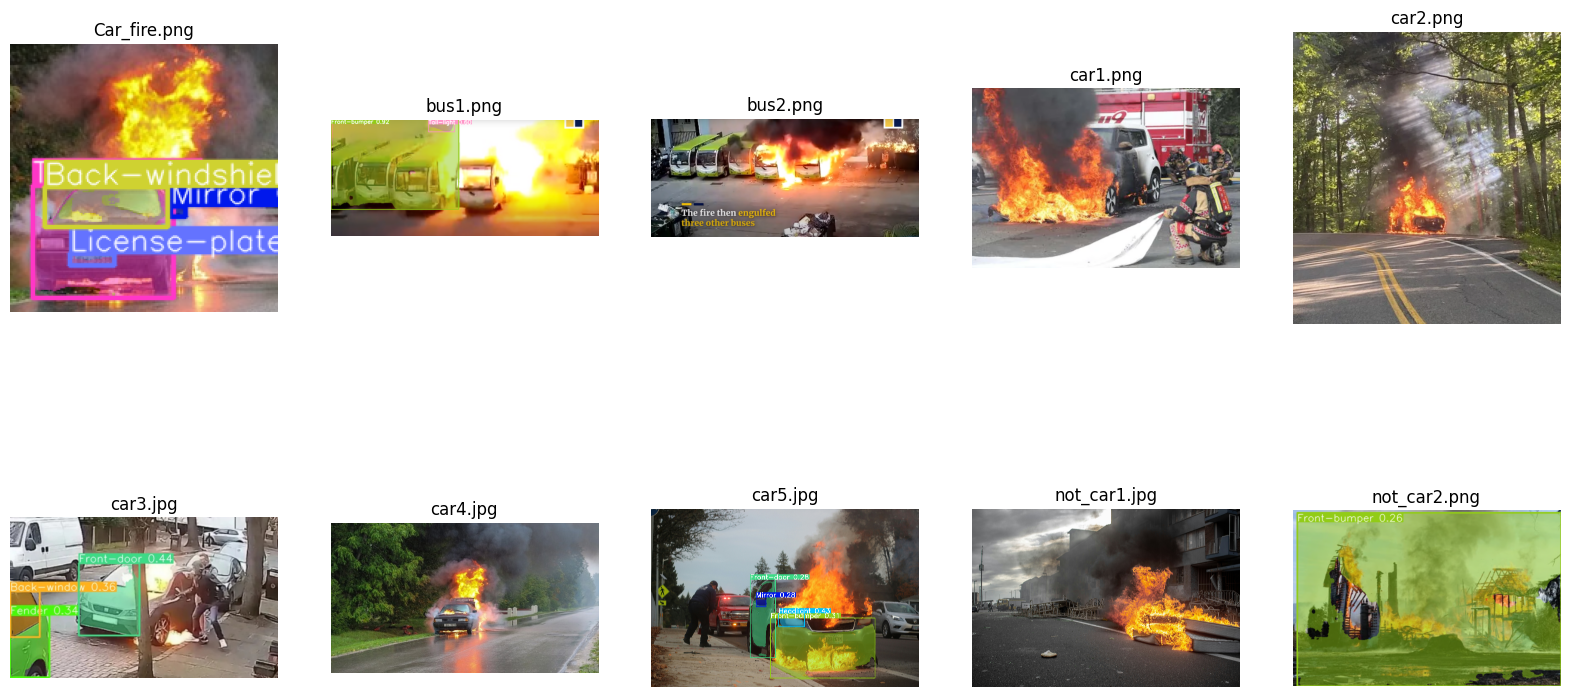

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
# drive.mount('/content/drive')

# Path to the folder containing images in your Google Drive
folder_path = "/content/drive/My Drive/Seg/runs/segment/predict3"

# Get list of files in the folder
file_list = os.listdir(folder_path)

# Filter only image files (you can adjust the extensions as needed)
image_files = [f for f in file_list if f.endswith(".jpg") or f.endswith(".png")]

# Display the first 10 images
num_images_to_display = min(10, len(image_files))

plt.figure(figsize=(20, 10))
for i in range(num_images_to_display):
    # Open the image using PIL
    img = Image.open(os.path.join(folder_path, image_files[i]))

    # Plot the image
    plt.subplot(2, 5, i+1)  # Adjust subplot grid as needed
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(image_files[i])

plt.show()


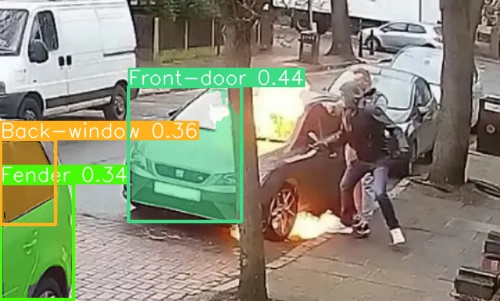

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Seg/runs/segment/predict2/car3.jpg')
cv2_imshow(image)



In [ ]:
fire_model = YOLO("/content/drive/MyDrive/Seg/Fire_model/weights/best.pt")

In [ ]:
results = fire_model.predict(source='test2',save=True,imgsz=256)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    # result.save(filename='result.jpg')  # save to disk


image 1/10 /content/drive/MyDrive/Seg/test2/Car_fire.png: 256x256 3 fires, 171.2ms
image 2/10 /content/drive/MyDrive/Seg/test2/bus1.png: 128x256 1 fire, 88.3ms
image 3/10 /content/drive/MyDrive/Seg/test2/bus2.png: 128x256 (no detections), 73.8ms
image 4/10 /content/drive/MyDrive/Seg/test2/car1.png: 192x256 3 fires, 97.7ms
image 5/10 /content/drive/MyDrive/Seg/test2/car2.png: 256x256 1 fire, 114.7ms
image 6/10 /content/drive/MyDrive/Seg/test2/car3.jpg: 160x256 2 fires, 81.4ms
image 7/10 /content/drive/MyDrive/Seg/test2/car4.jpg: 160x256 2 fires, 81.5ms
image 8/10 /content/drive/MyDrive/Seg/test2/car5.jpg: 192x256 3 fires, 86.1ms
image 9/10 /content/drive/MyDrive/Seg/test2/not_car1.jpg: 192x256 2 fires, 90.8ms
image 10/10 /content/drive/MyDrive/Seg/test2/not_car2.png: 192x256 2 fires, 87.6ms
Speed: 1.2ms preprocess, 97.3ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 256)
Results saved to runs/detect/predict3


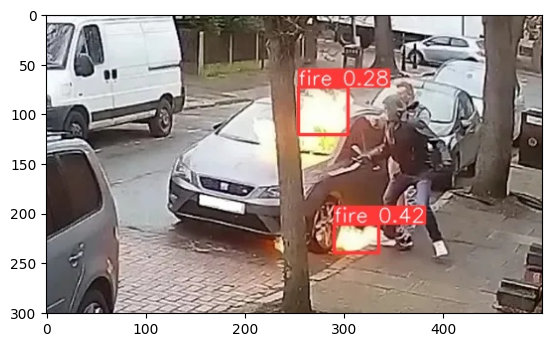

Image size: 500 x 301


In [ ]:
import cv2
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/Seg/runs/detect/predict3/car3.jpg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Hide axes
plt.show()

# Get the size of the image
image_height, image_width, _ = image.shape
print("Image size: {} x {}".format(image_width, image_height))


In [ ]:
print(results[5].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.4199, 0.2774])
data: tensor([[2.9020e+02, 2.1149e+02, 3.3542e+02, 2.4086e+02, 4.1993e-01, 0.0000e+00],
        [2.5499e+02, 7.3100e+01, 3.0434e+02, 1.2183e+02, 2.7738e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (301, 500)
shape: torch.Size([2, 6])
xywh: tensor([[312.8091, 226.1717,  45.2276,  29.3723],
        [279.6667,  97.4660,  49.3456,  48.7320]])
xywhn: tensor([[0.6256, 0.7514, 0.0905, 0.0976],
        [0.5593, 0.3238, 0.0987, 0.1619]])
xyxy: tensor([[290.1953, 211.4855, 335.4229, 240.8578],
        [254.9939,  73.1000, 304.3394, 121.8320]])
xyxyn: tensor([[0.5804, 0.7026, 0.6708, 0.8002],
        [0.5100, 0.2429, 0.6087, 0.4048]])


In [ ]:
import torch

# Given bounding box coordinates
xyxy = results[5].boxes.xyxy

# Calculate the coordinates of the encompassing bounding box
x_min = xyxy[:, 0].min()
y_min = xyxy[:, 1].min()
x_max = xyxy[:, 2].max()
y_max = xyxy[:, 3].max()

encompassing_bbox = [x_min, y_min, x_max, y_max]

# Print the encompassing bounding box coordinates
print("Encompassing bounding box coordinates:")
print(encompassing_bbox)


Encompassing bounding box coordinates:
[tensor(254.9939), tensor(73.1000), tensor(335.4229), tensor(240.8578)]


Image size: 500 x 301


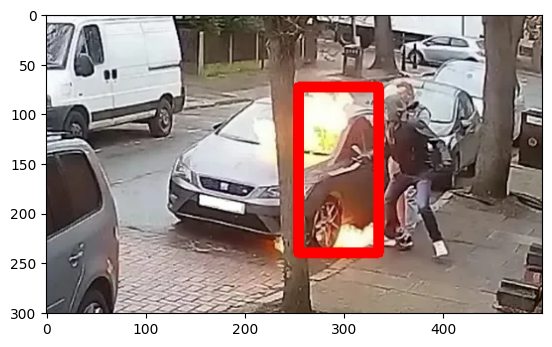

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torch

def tensor_to_array(tensor):
    if isinstance(tensor, list):
        return [t.item() for t in tensor]
    else:
        return tensor.item()

def superimpose_expanded_bbox(image_path, bbox_tensor):
    bbox = [tensor_to_array(coord) for coord in bbox_tensor]

    # Load the image
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape
    print("Image size: {} x {}".format(image_width, image_height))

    # Draw the expanded bounding box on the image
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 10)

    # Display the image with the expanded bounding box
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    plt.show()

# Path to the image
image_path = "/content/drive/MyDrive/Seg/test2/car3.jpg"  # Replace with the actual path to your image

# Call the function to superimpose the expanded bounding box on the image
superimpose_expanded_bbox(image_path, encompassing_bbox)


Image size: 500 x 301
202.7149803161621
10


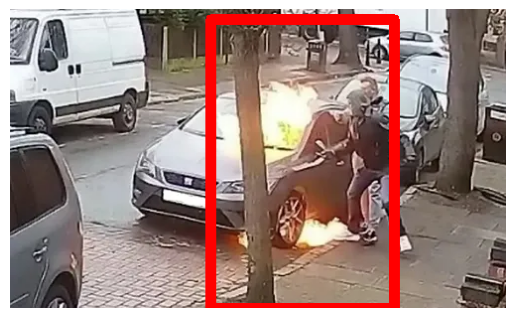

[202.7149803161621, 10, 387.70175247192384, 301]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import torch

def tensor_to_array1(tensor):
    if isinstance(tensor, list):
        return [t.item() for t in tensor]
    else:
        return tensor.item()

def expand_bbox1(bbox, image_width, image_height, percentage):
    x_min, y_min, x_max, y_max = bbox
    extent_x = (x_max - x_min) * percentage / 100
    extent_y = (y_max - y_min) * percentage / 100
    x_min -= extent_x
    y_min -= extent_y
    x_max += extent_x
    y_max += extent_y
    # Ensure the expanded bounding box stays within the image boundaries
    x_min = max(10, x_min)
    print(x_min)
    y_min = max(10, y_min)
    print(y_min)
    x_max = min(image_width, x_max)
    y_max = min(image_height, y_max)
    return [x_min, y_min, x_max, y_max]


def superimpose_expanded_bbox1(image_path, bbox_tensor, percentage):
    bbox = [tensor_to_array1(coord) for coord in bbox_tensor]

    # Load the image
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape
    print("Image size: {} x {}".format(image_width, image_height))

    bbox_expanded = expand_bbox1(bbox, image_width, image_height, percentage)

    # Draw the expanded bounding box on the image
    x_min, y_min, x_max, y_max = bbox_expanded
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 10)

    # Display the image with the expanded bounding box
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(bbox_expanded)

    return bbox_expanded

# Path to the image
image_path = "/content/drive/MyDrive/Seg/test2/car3.jpg"

# Percentage to expand the bounding box (you can adjust this value as needed)
percentage = 65

# Call the function to superimpose the expanded bounding box on the image
bounding_box_coords = superimpose_expanded_bbox1(image_path, encompassing_bbox, percentage)


In [ ]:
model = YOLO("runs/segment/train2/weights/best.pt")

In [ ]:
def apply_second_model(image_path, bbox_expanded):
    print(bbox_expanded)
    # Load the image
    image = cv2.imread(image_path)

    # Crop the region defined by the expanded bounding box
    x_min, y_min, x_max, y_max = bbox_expanded
    cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]

    results = model.predict(source=cropped_image, save=True)

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



[202.7149803161621, 10, 387.70175247192384, 301]

0: 640x416 1 Back-wheel, 1 Quarter-panel, 261.3ms
Speed: 3.4ms preprocess, 261.3ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/segment/predict4


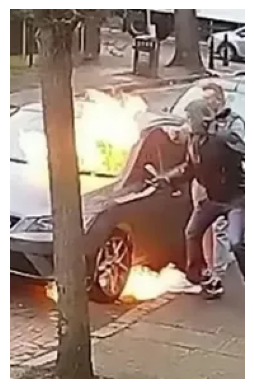

In [ ]:
# Example usage
image_path = "/content/drive/MyDrive/Seg/test2/car3.jpg"  # Replace with the actual path to your image

# Call the function to apply the YOLO model on the cropped image
apply_second_model(image_path, bounding_box_coords)

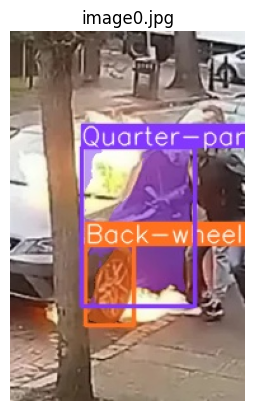

In [ ]:
import os
import matplotlib.pyplot as plt

def show_images_in_folder(folder_path):
    # Get all files in the folder
    files = os.listdir(folder_path)
    image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    # Display each image
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)
        plt.show()

# Example usage: Provide the path to the folder containing images
folder_path = "runs/segment/predict4"
show_images_in_folder(folder_path)
